(240, 240)


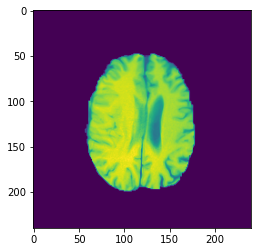

(240, 240)


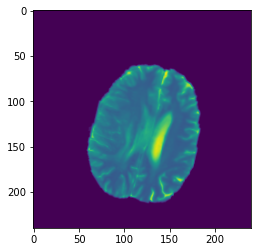

In [12]:
import numpy as np
import cv2
import cv2 as cv
import matplotlib.pyplot as plt # plt 用於顯示圖片
import matplotlib.image as mpimg # mpimg 用於讀取圖片
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import cos,sin,radians

from skimage.draw import ellipse
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate


from PIL import Image



img_ori=np.load("data/t1_original.npy")
#print(img)
print(img_ori.shape)

plt.imshow(img_ori)
plt.show()

img_rot=np.load("data/t2_rot.npy")
img_rot.shape
print(img_rot.shape)
plt.imshow(img_rot)

plt.show()


In [19]:
def rotate(image, angle, center = None, scale = 1.0):
    
    (h, w) = image.shape[:2]

    if center is None:
        center = (w / 2, h / 2)

    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (w, h))

    return rotated


def mov(img, dx, dy):
    num_rows, num_cols = img.shape[:2]
    translation_matrix = np.float32([ [1,0,dx], [0,1,dy] ])
    img_translation = cv2.warpAffine(img, translation_matrix, (num_cols, num_rows))
    return img_translation

'''
##跑result專用
def err(dx, dy, dtheta):
    #dx, dy, dtheta = d3
    img1 = mov(img_rot, dx, dy)
    img1 = rotate(img1, dtheta)
    sos = np.sum((img_ori-img1)**2)
    return sos
'''
def err(d3):
    dx, dy, dtheta = d3
    img1 = mov(img_rot, dx, dy)
    img1 = rotate(img1, dtheta)
    sos = np.sum((img_ori-img1)**2)
    return sos
    


In [15]:
result = []
for xx in range(-20, 20):
    print(xx)
    for yy in range(-20, 20):
        for tt in range(-20, 20):
            result.append([xx, yy, tt, err(xx, yy, tt)])

-20
-19
-18
-17
-16
-15
-14
-13
-12
-11
-10
-9
-8
-7
-6
-5
-4
-3
-2
-1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [17]:
result = np.array(result)
opt = result[np.argmin(result[:, 3])]

In [18]:
opt

array([-6.00000000e+00, -1.20000000e+01,  1.00000000e+01,  4.31386307e+08])

In [21]:
from scipy.optimize import minimize, rosen, rosen_der

res_Nelder_Mead = minimize(err,[ 6,  -12, 10], method='Nelder-Mead', tol=1e-6)
res_Nelder_Mead


 final_simplex: (array([[ -6.49932001, -13.26004073,  17.32723379],
       [ -6.49932051, -13.26004044,  17.32723381],
       [ -6.49932011, -13.26004126,  17.32723372],
       [ -6.49932018, -13.26004118,  17.32723399]]), array([4.20572592e+08, 4.20572592e+08, 4.20572592e+08, 4.20572592e+08]))
           fun: 420572591.78987086
       message: 'Optimization terminated successfully.'
          nfev: 197
           nit: 90
        status: 0
       success: True
             x: array([ -6.49932001, -13.26004073,  17.32723379])

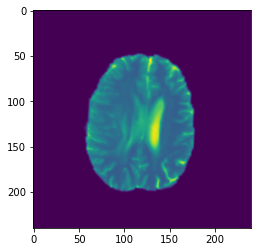

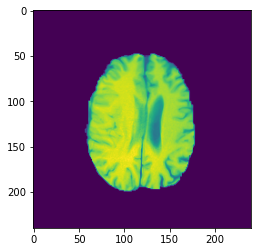

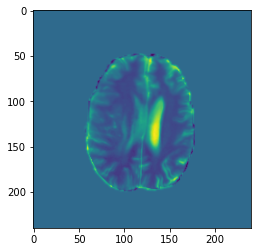

In [22]:
img1 = mov(img_rot, opt[0], opt[1])
img1 = rotate(img1, opt[2])
plt.figure()
plt.imshow(img1)
plt.figure()
plt.imshow(img_ori)
plt.figure()
plt.imshow(img1-img_ori)

In [4]:
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'nearest'


In [10]:
import nibabel as nib
t1_slice = np.load("data/t1_original.npy")
#t1_data = t1_img.get_data()
t2_slice= np.load("data/t2_rot.npy")
#t2_data = t2_img.get_data()

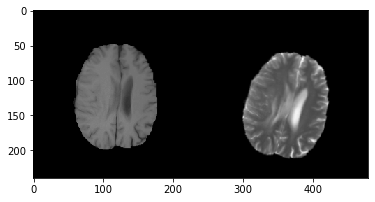

In [11]:
plt.imshow(np.hstack((t1_slice, t2_slice)))

Text(0.5, 1.0, 'T2 slice histogram')

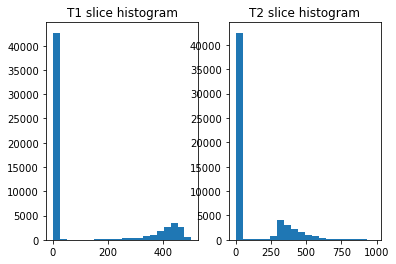

In [12]:
fig, axes = plt.subplots(1, 2)
axes[0].hist(t1_slice.ravel(), bins=20)

axes[0].set_title('T1 slice histogram')

axes[1].hist(t2_slice.ravel(), bins=20)

axes[1].set_title('T2 slice histogram')


0.7820856258213412

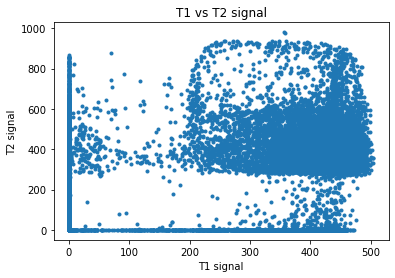

In [13]:
plt.plot(t1_slice.ravel(), t2_slice.ravel(), '.')

plt.xlabel('T1 signal')

plt.ylabel('T2 signal')

plt.title('T1 vs T2 signal')

np.corrcoef(t1_slice.ravel(), t2_slice.ravel())[0, 1]



Text(0.5, 1.0, 'T2 slice')

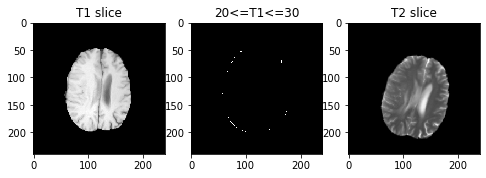

In [14]:
# Array that is True if T1 signal >= 20, <= 30, False otherwise
t1_20_30 = (t1_slice >= 20) & (t1_slice <= 30)
# Show T1 slice, mask for T1 between 20 and 30, T2 slice
fig, axes = plt.subplots(1, 3, figsize=(8, 3))
axes[0].imshow(t1_slice)

axes[0].set_title('T1 slice')

axes[1].imshow(t1_20_30)

axes[1].set_title('20<=T1<=30')

axes[2].imshow(t2_slice)

axes[2].set_title('T2 slice')

Text(0, 0.5, 'T2 signal bin')

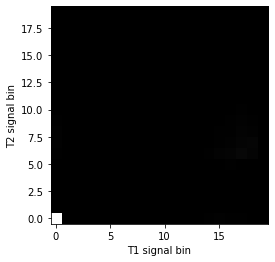

In [16]:
hist_2d, x_edges, y_edges = np.histogram2d(t1_slice.ravel(),t2_slice.ravel(),bins=20)
# Plot as image, arranging axes as for scatterplot
# We transpose to put the T1 bins on the horizontal axis
# and use 'lower' to put 0, 0 at the bottom of the plot
plt.imshow(hist_2d.T, origin='lower')

plt.xlabel('T1 signal bin')

plt.ylabel('T2 signal bin')


Text(0, 0.5, 'T2 signal bin')

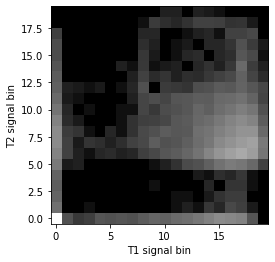

In [17]:
 # Show log histogram, avoiding divide by 0
hist_2d_log = np.zeros(hist_2d.shape)
non_zeros = hist_2d != 0
hist_2d_log[non_zeros] = np.log(hist_2d[non_zeros])
plt.imshow(hist_2d_log.T, origin='lower')

plt.xlabel('T1 signal bin')

plt.ylabel('T2 signal bin')


In [20]:
def mutual_information(hgram):
#Mutual information for joint histogram
# Convert bins counts to probability values
    pxy = hgram / float(np.sum(hgram))
    px = np.sum(pxy, axis=1) # marginal for x over y
    py = np.sum(pxy, axis=0) # marginal for y over x
    px_py = px[:, None] * py[None, :] # Broadcast to multiply marginals
# Now we can do the calculation using the pxy, px_py 2D arrays
    nzs = pxy > 0 # Only non-zero pxy values contribute to the sum
    return np.sum(pxy[nzs] * np.log(pxy[nzs] / px_py[nzs]))

In [21]:
mutual_information(hist_2d)


0.37708438659371424

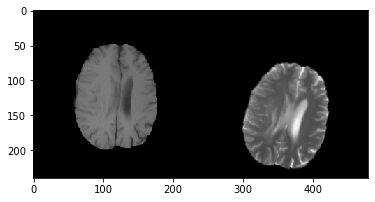

In [22]:
t2_slice_moved = np.zeros(t2_slice.shape)
t2_slice_moved[15:, :] = t2_slice[:-15, :]
plt.imshow(np.hstack((t1_slice, t2_slice_moved)))

Text(0.5, 1.0, 'T1 vs T2 signal after moving T2 image')

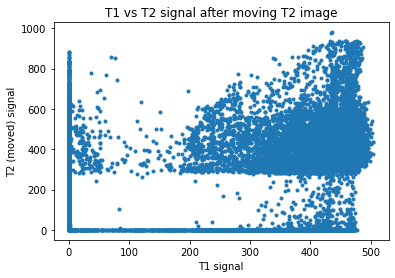

In [23]:
plt.plot(t1_slice.ravel(), t2_slice_moved.ravel(), '.')

plt.xlabel('T1 signal')

plt.ylabel('T2 (moved) signal')

plt.title('T1 vs T2 signal after moving T2 image')


In [24]:
 hist_2d_moved, x_edges, y_edges = np.histogram2d(t1_slice.ravel(),t2_slice_moved.ravel(),bins=20)

Text(0, 0.5, 'T2 signal bin')

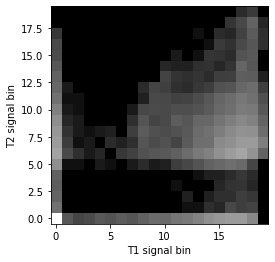

In [25]:
# Show log histogram, avoiding divide by 0
hist_2d_moved_log = np.zeros(hist_2d_moved.shape)
non_zeros = hist_2d_moved != 0
hist_2d_moved_log[non_zeros] = np.log(hist_2d_moved[non_zeros])
plt.imshow(hist_2d_moved_log.T, origin='lower')

plt.xlabel('T1 signal bin')

plt.ylabel('T2 signal bin')


In [27]:
mutual_information(hist_2d_moved)

0.2493217061313837